Need to be able to predict the quality of  from a set of Data used has already been cleaned but may need to be molded.  predictor variables. Need to define precitor variables then model and score them. Data used has already been cleaned but may need to be molded.   

In [13]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [14]:
winequality ='winequality.csv'
df = pd.read_csv(winequality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
df.shape

(6497, 13)

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


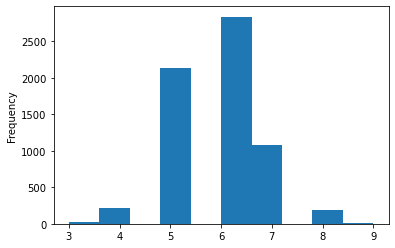

In [18]:
# Making histogram of quality to see distribution.
df["quality"].plot.hist()

In [19]:
# statistical summary of quality 
df["quality"].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [20]:
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [21]:
df["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

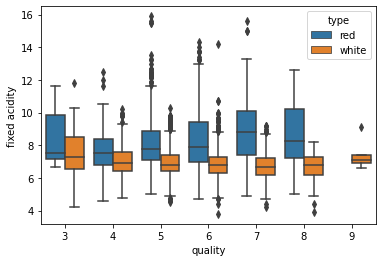

In [22]:
#boxplots quality vs target
sns.boxplot(y='fixed acidity', x='quality', data=df, hue='type')

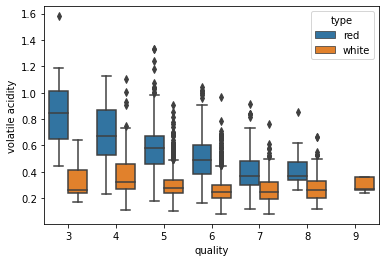

In [23]:
sns.boxplot(y='volatile acidity', x='quality', data=df, hue='type')

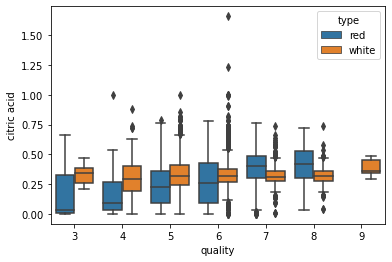

In [24]:
sns.boxplot(y='citric acid', x='quality', data=df, hue='type')

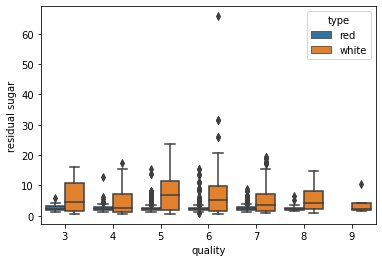

In [25]:
sns.boxplot(y='residual sugar', x='quality', data=df, hue='type')

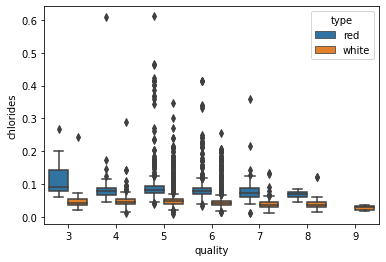

In [26]:
sns.boxplot(y='chlorides', x='quality', data=df, hue='type')

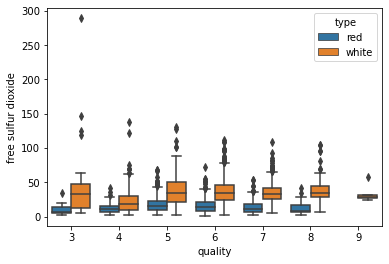

In [27]:
sns.boxplot(y='free sulfur dioxide', x='quality', data=df, hue='type')

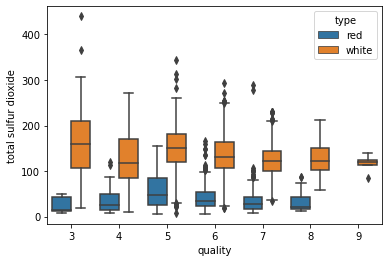

In [28]:
sns.boxplot(y='total sulfur dioxide', x='quality', data=df, hue='type')

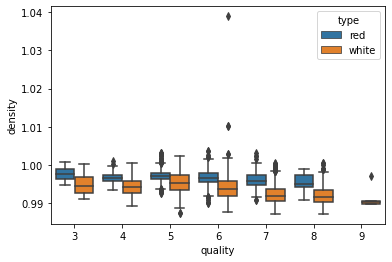

In [29]:
sns.boxplot(y='density', x='quality', data=df, hue='type')

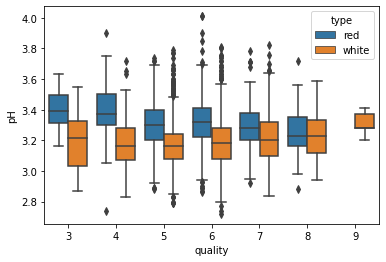

In [30]:
sns.boxplot(y='pH', x='quality', data=df, hue='type')

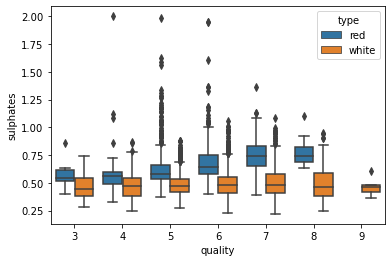

In [31]:
sns.boxplot(y='sulphates', x='quality', data=df, hue='type')

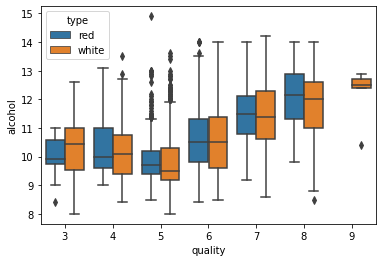

In [32]:
sns.boxplot(y='alcohol', x='quality', data=df, hue='type')

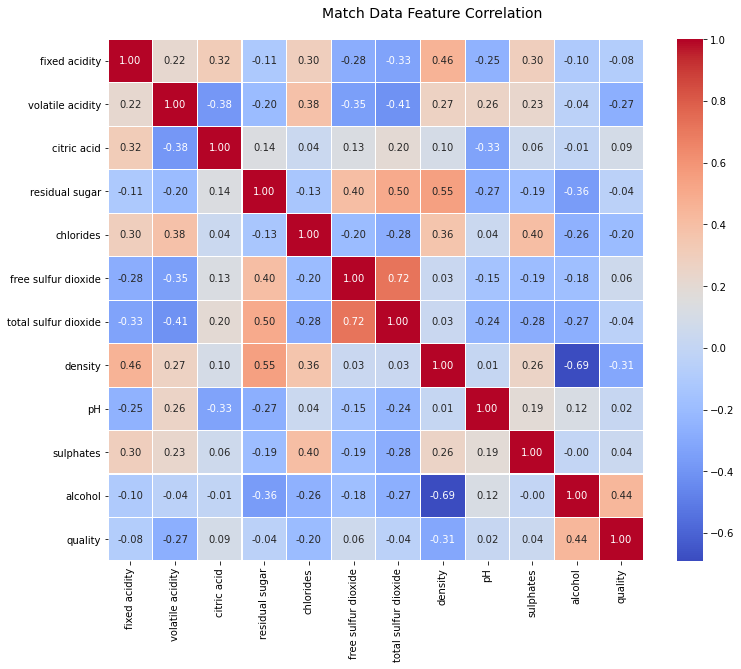

In [33]:
#Create a correlation heatmap for looking at the correlation of all features
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation', fontsize=14)

In [34]:
#save to csv for next step
df.to_csv(r'Capstone2_EDA_finis.csv')